# TASK : IRIS FLOWER CLASSIFICATION

    Author:Ranjit Debnath
    
    Batch:May-June
    
    Domain:Data Science
    
    Aim:To build a model that can classify iris flower into different species based on their sepal and petal measurements

IMPORTING IMPORTANT LIBRARIES

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

IMPORTING DATASET

In [38]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
df.shape  #It prints the number of rows and columns of the dataset

(150, 6)

In [40]:
df.size

900

In [41]:
df.info() #It prints the number of non NULL values and the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
df.isnull().sum() #prints the number of NULL values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Analyzing the Data through different plots

Text(0.5, 1.0, 'Scatter plot')

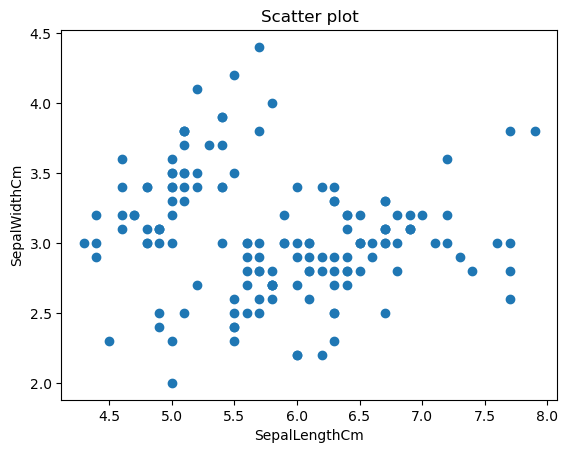

In [44]:
plt.scatter(x='SepalLengthCm',y='SepalWidthCm',data=df)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Scatter plot')

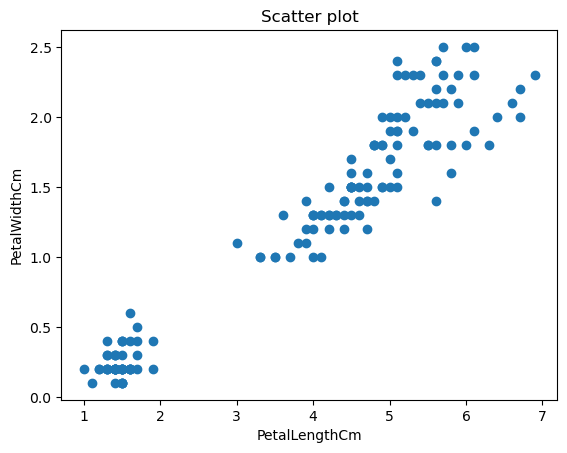

In [45]:
plt.scatter(x='PetalLengthCm',y='PetalWidthCm',data=df)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Histogram')

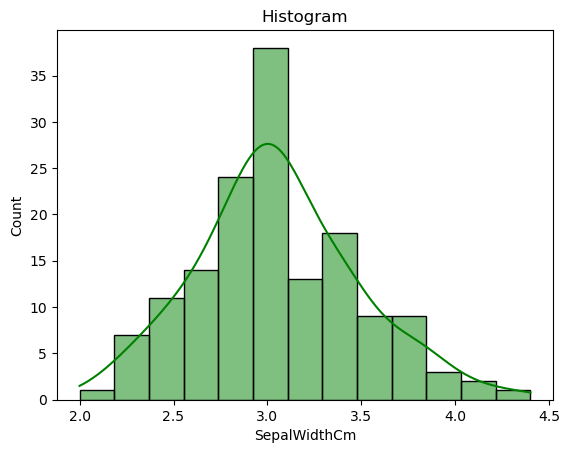

In [46]:
sns.histplot(x='SepalWidthCm',data=df,kde=True,color='g')
plt.title('Histogram')

Text(0.5, 1.0, 'Scatter plot')

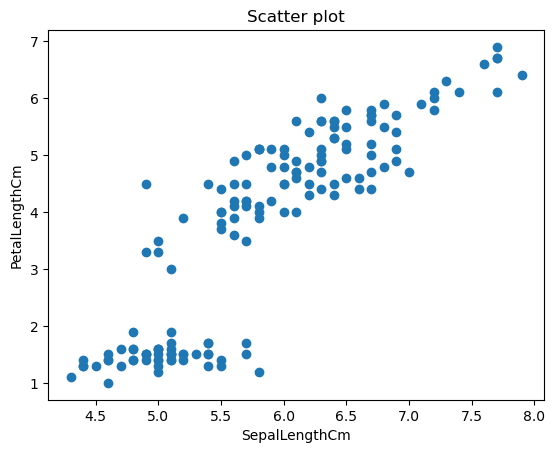

In [47]:
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df)
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.title('Scatter plot')

# Finding the Value of K by elbow method

In [48]:
# SSE--> Sum of Squared Error
sse = []
k_range = range(1,10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[['SepalLengthCm','PetalLengthCm']])
    sse.append(kmeans.inertia_)  #The SSE comes in Kmeans.inertia funtion

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [49]:
sse

[566.0320666666668,
 112.96262731481482,
 53.801351193126536,
 34.314420779220775,
 25.636859375524605,
 21.914512998713,
 18.508372073937295,
 15.1240729758747,
 13.570063969846583]

Text(0.5, 1.0, 'Elbow Method For Optimal K')

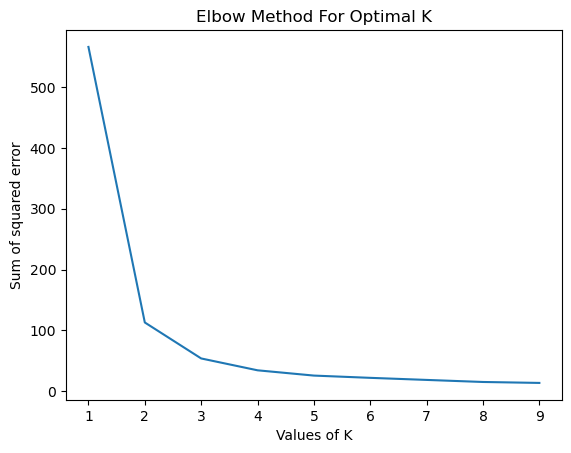

In [50]:
plt.xlabel('Values of K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)
plt.title('Elbow Method For Optimal K')

From the above plot the value of K is 3

# Creating a KMeans Classifier

In [51]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(df[['SepalLengthCm','PetalLengthCm']]) #Training and predicting done simultaneously together
y_predicted

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [54]:
df['cluster']=y_predicted
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [55]:
kmeans.cluster_centers_   #It has printed the coordinate of centroid of three cluster

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49411765],
       [5.87413793, 4.39310345]])

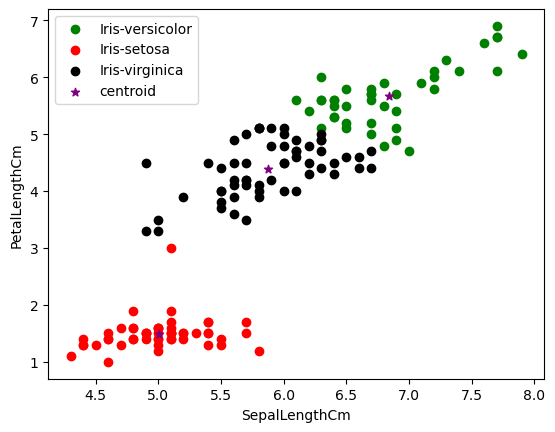

In [56]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df1,color='green',label='Iris-versicolor')
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df2,color='red',label='Iris-setosa')
plt.scatter(x='SepalLengthCm',y='PetalLengthCm',data=df3,color='black',label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()

# THE END